In [2]:
"""
To run this notebook, please install the required dependencies by running this cell
"""

!pip install pandas numpy matplotlib pillow

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import io
from PIL import Image

In [9]:
df = pd.read_pickle('data.pickle')
df

,FASE,X,Y,Z,Ecoh,Eg,a0,b0,c0,Qx,...,Q(yo4) – Qx,Dx,Dy,Do,Dz,ECNx,ECNy,ECNo,ECNz,LDOS
0,0.5,Ba,As,NaN,-4.19,3.69,8.855,8.669,6.347,1.538,...,-3.092,2.672,1.673,1.305,1.020,7.156,3.920,1.184,1.009,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...
1,0.5,Ba,V,NaN,-5.04,3.43,8.657,8.937,6.320,1.592,...,-3.207,2.711,1.642,1.328,0.997,7.757,3.723,1.248,1.000,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...
2,0.5,Cd,As,NaN,-3.80,2.80,9.910,8.452,5.555,1.162,...,-2.525,2.210,1.693,1.329,1.025,5.973,3.994,1.349,1.001,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...
3,0.5,Cd,V,NaN,-4.65,3.07,9.412,8.955,5.465,1.253,...,-2.711,2.276,1.649,1.339,1.005,6.065,3.792,1.258,1.000,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...
4,0.5,Mg,As,NaN,-4.07,3.28,9.070,8.533,5.205,1.475,...,-3.006,2.052,1.677,1.323,1.024,5.925,3.954,1.356,1.024,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,2.0,Sr,P,NaN,-5.61,3.98,7.458,12.738,9.923,1.476,...,-3.933,2.358,1.554,1.649,NaN,6.397,3.995,1.335,NaN,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...
140,2.0,Zn,P,NaN,-4.42,2.88,6.550,11.926,9.293,1.078,...,-2.824,1.990,1.532,1.605,NaN,4.484,3.977,1.426,NaN,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...
141,2.0,Ca,As,NaN,-5.13,3.18,7.176,12.337,9.888,1.407,...,-3.727,2.237,1.704,1.772,NaN,5.750,3.994,1.345,NaN,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...
142,2.0,Ca,V,NaN,-5.97,3.14,7.181,12.297,9.878,1.444,...,-3.792,2.241,1.698,1.774,NaN,5.643,3.987,1.350,NaN,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...


In [10]:
def ldos_visualizer( 
               phase, 
               X, 
               Y, 
               Z='NA', 
               fig_size=(24,12),
               show_fig=True,
               save_fig=False,
               name=None):
    
    if(Z == 'NA'):
        image_data = df.loc[(df['FASE'] == phase) & (df['X'] == X) & (df['Y'] == Y), 'LDOS'].iloc[0]
    else:    
        image_data = df.loc[(df['FASE'] == phase) & (df['X'] == X) & (df['Y'] == Y) & (df['Z'] == Z), 'LDOS'].iloc[0]

        
    img = Image.open(io.BytesIO(image_data))
    img_arr = np.asarray(img)
    
    # Render the image using matplotlib
    fig, ax = plt.subplots(figsize=fig_size)
    ax.axis('off')
    ax.imshow(img_arr, cmap='gray')

    if(show_fig):
        # Show the plot
        plt.show()
    
    if(save_fig):
        plt.savefig(name,bbox_inches='tight')

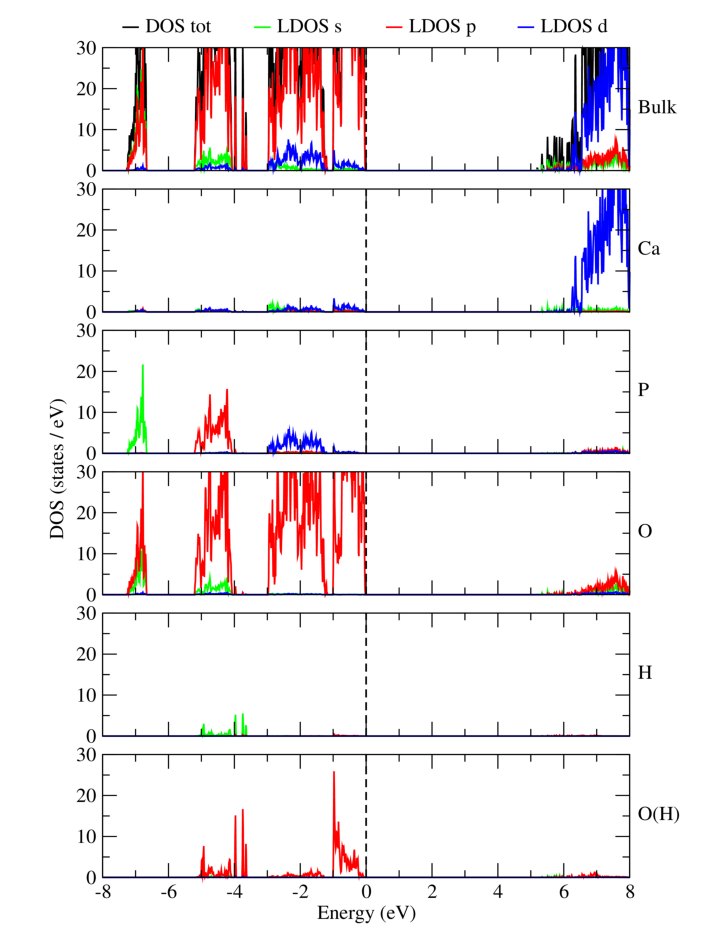

In [7]:
ldos_visualizer(phase=1.67, X='Ca', Y='P', Z='OH')